<a href="https://colab.research.google.com/github/RomaricMathis/TIGD/blob/main/M2_I3D__Morpho_math_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import skimage
import numpy as np # tableaux
import scipy.ndimage as scp # correlation et convolution
import matplotlib.pyplot as plt # visionneur et tracés

from skimage import data # petite banque d'images
from skimage import util # conversions entier <-> flottants etc.
from skimage import filters as flt # 'filter' ou 'filters' suivant la version de skimage
from skimage import morphology,segmentation,io
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# les données ne sont pas persistantes dans un document colab
# récupération des images sur un serveur git
!rm -r images
!rm -r m2i3d_morpho
!git clone https://github.com/bnaegel/m2i3d_morpho.git
!mv m2i3d_morpho images

rm: cannot remove 'm2i3d_morpho': No such file or directory
Cloning into 'm2i3d_morpho'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 57 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


### Reconstruction géodésique

Documentation : http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.reconstruction



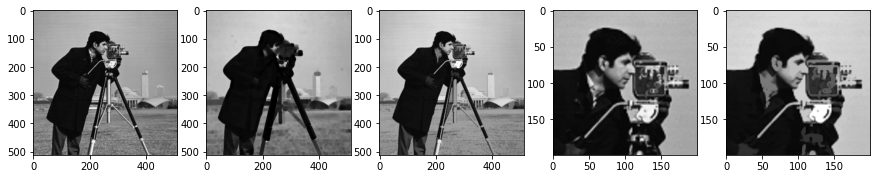

In [ ]:
# image en niveaux de gris
I=data.camera()
se=morphology.disk(5)
J=morphology.erosion(I,se)

K=morphology.reconstruction(J,I,method='dilation')

y1=50
y2=250
x1=150
x2=350

crop1=I[y1:y2,x1:x2]
crop2=K[y1:y2,x1:x2]

plt.subplot(1,5,1)
plt.imshow(I,cmap='gray')
plt.subplot(1,5,2)
plt.imshow(J,cmap='gray')
plt.subplot(1,5,3)
plt.imshow(K,cmap='gray')
plt.subplot(1,5,4)
plt.imshow(crop1,cmap='gray')
plt.subplot(1,5,5)
plt.imshow(crop2,cmap='gray')


### Segmentation par ligne de partage des eaux

http://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.watershed

In [ ]:
I=skimage.io.imread('images/peppers.pgm')
print(I.dtype)
# calcul du gradient morphologique
B=morphology.disk(1)
g=morphology.dilation(I,B)-morphology.erosion(I,B)
gi=g-morphology.erosion(I,B)
# filtre h-min pour filtrer les minima du gradient non significatifs
h=20
# les valeurs de gh vont dépasser les bornes du uint8 : on la passe en uint16
gh=g.astype('uint16')+h
# puis on effectue un clipping sur les valeurs pour reconvertir l'image en uint8
gh=np.clip(gh,0,255).astype('uint8')
# reconstruction géodésique par érosion de g+h dans g
gh=morphology.reconstruction(gh,g,method='erosion')


uint8


Nombre de labels : 358


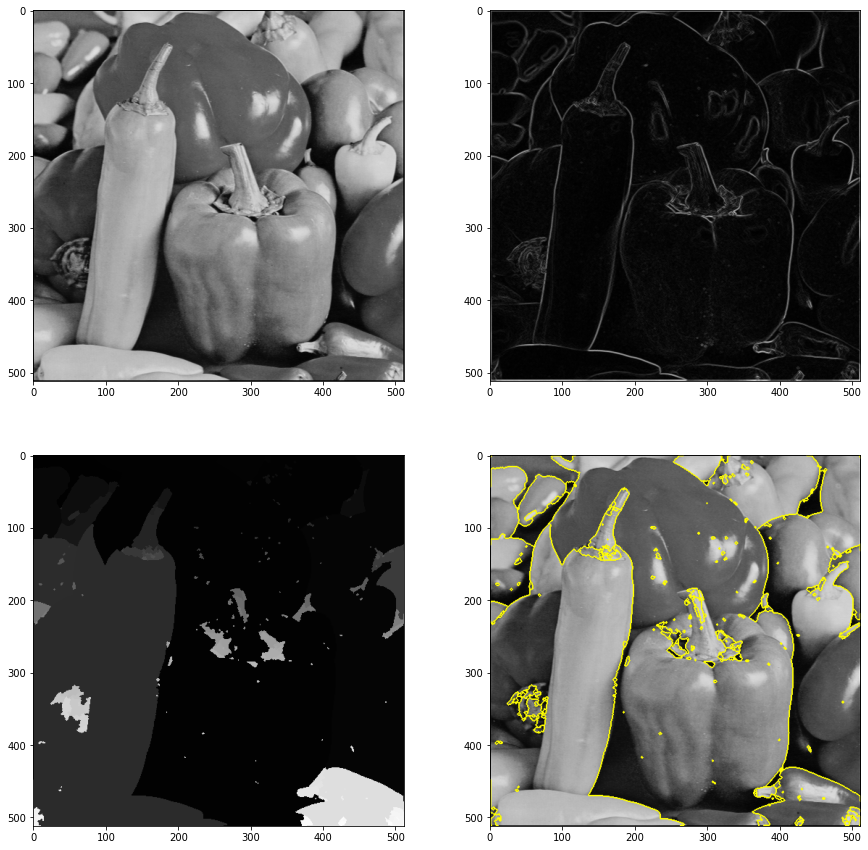

In [ ]:
# extraction des minima régionaux
m=morphology.local_minima(gh)
# étiquetage des minima 
# l : tableau avec les labels étiquetés
# n : nombre de labels (minima)
l,n=scp.label(m)
print("Nombre de labels :",n)
# ligne de partage des eaux sur gh à partir du marqueur l
s=morphology.watershed(gh,l)
# superposition des frontières des régions sur l'image de départ
b=skimage.segmentation.mark_boundaries(I,s)

plt.subplot(2,2,1)
plt.imshow(I,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(g,cmap='gray')

plt.subplot(2,2,3)
plt.imshow(s,cmap='gray')

plt.subplot(2,2,4)
plt.imshow(b)

### Seuillage par hystérèse


Bien souvent, un seuillage global d’une image ne permet pas de segmenter efficacement des objets. Le principe du seuillage par hystérese est le suivant :

* on utilise un seuil large pour conserver le maximum de points des objets à segmenter (image I1).
* on utilise un seuil étroit pour conserver uniquement des points appartenant aux objets à segmenter (image I2).
* on reconstruit les objets à segmenter en effectuant une reconstruction géodésique par dilatation de l’image du
seuil étroit dans l’image du seuil large.

Voir aussi : http://dpt-info.u-strasbg.fr/~cronse/TIDOC/FEAT/double.html

Ainsi dans le résultat final apparaîtront uniquement les composantes connexes de I1 contenant les points de I2. Cette technique ne fonctionne que si, dans I1, il n’existe aucune connexion entre les objets à segmenter et les objets indésirables (bruit, fond de l’image...).
Illustrez l’intérêt de cette technique sur l’image 'pcb_gray.tif'. Écrire le script correspondant.

### Segmentation

On souhaite segmenter les objets de l'image 'objets.jpg' :
* Calculer le gradient morphologique de l’image.
* Calculer la ligne de partage des eaux en utilisant le gradient comme fonction de segmentation et les minima régionaux du gradient comme marqueurs (fonction watershed). Que constatez-vous ?
* On va filtrer les minima non significatifs de l’image gradient. Dans ce but, on va utiliser le filtre connexe ’h-min’ permettant de supprimer les minima de dynamique trop faible. Une possibilité pour estimer la valeur du paramètre h peut consister à calculer, pour chaque valeur de h, le nombre de minima restant après application du filtre h-min.
* Enfin, on calcule la ligne de partage des eaux sur la fonction de segmentation obtenue
* Finalement, superposer l’image originale avec la segmentation obtenue.

(512, 512)


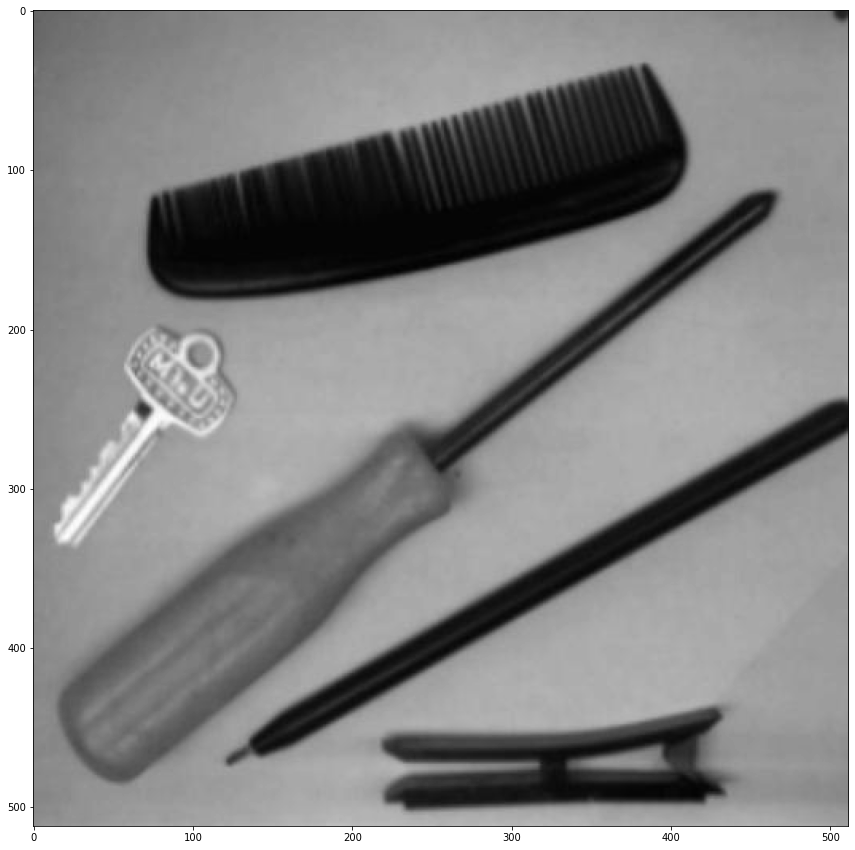

In [ ]:
I=skimage.io.imread('images/objets.jpg')
print(I.shape)
plt.imshow(I,cmap='gray')

### Extraction des routes

Dans l'image `tele.png`, utiliser une succession d'opérateurs morphologiques pour extraire, au mieux, le réseau routier.

(1222, 1800)


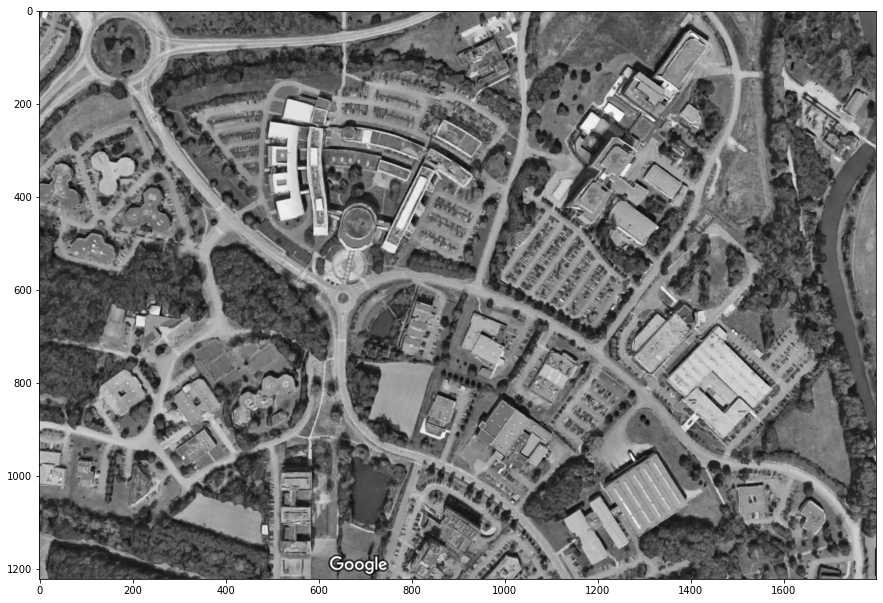

In [ ]:
I=skimage.io.imread('images/tele.png')
print(I.shape)
plt.imshow(I,cmap='gray')